## ML ALGORITHMS

### Supervised ML
#### Linear Regression, Ridge and Lasso

In [76]:
#predict the sepal length (first feature) based on other features
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Assuming you want to predict the sepal length (first feature) based on other features
target_feature_index = 0
target_feature_name = iris.feature_names[target_feature_index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, X[:, target_feature_index], test_size=0.2, random_state=42)

# Create a linear regression model
lin_reg = LinearRegression()

# Perform cross-validation on the entire dataset
mse_scores = cross_val_score(lin_reg, X, X[:, target_feature_index], scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE Scores:", mse_scores)
print("Mean Cross-Validation MSE:", mse_scores.mean())

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Now, let's make predictions on new data (using the test set in this case)
new_data = X_test
predictions = lin_reg.predict(new_data)

print("\nPredicted Sepal Lengths:", predictions)
print("Actual Sepal Lengths:", y_test)


Cross-Validation MSE Scores: [-5.52202634e-30 -5.52202634e-31 -5.25907270e-31 -2.97137608e-30
 -6.70531769e-30]
Mean Cross-Validation MSE: -3.255366002212042e-30

Predicted Sepal Lengths: [6.1 5.7 7.7 6.  6.8 5.4 5.6 6.9 6.2 5.8 6.5 4.8 5.5 4.9 5.1 6.3 6.5 5.6
 5.7 6.4 4.7 6.1 5.  6.4 7.9 6.7 6.7 6.8 4.8 4.8]
Actual Sepal Lengths: [6.1 5.7 7.7 6.  6.8 5.4 5.6 6.9 6.2 5.8 6.5 4.8 5.5 4.9 5.1 6.3 6.5 5.6
 5.7 6.4 4.7 6.1 5.  6.4 7.9 6.7 6.7 6.8 4.8 4.8]


### predicting housing prices

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df= fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(df)

sklearn.utils._bunch.Bunch

In [5]:
# df.data contains your data and df.feature_names contains feature names
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
dataset['Price']= df.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# #  Dividing the dataset into indepedent and dependent features
X = dataset.iloc[:,:-1]## independent features
Y= dataset.iloc[:,-1]## dependent features

In [23]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=42)

In [26]:
Y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [27]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg= LinearRegression()

lin_reg.fit(X_train, Y_train)

mse = cross_val_score(lin_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
print(mse)


[-0.54787556 -0.500835   -0.52045639 -0.51612252 -0.54883741]


In [29]:
mean_mse= np.mean(mse)
print(mean_mse)

-0.5268253746355749


In [31]:
# Now we can Make predictions by putting new_data or test data
price_predicted= lin_reg.predict(X_test)
print("\nPredicted Prices:", price_predicted )
print("Actual Price:", Y_test.values)



Predicted Prices: [0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]
Actual Price: [0.477   0.458   5.00001 ... 2.184   1.194   2.098  ]


In [33]:
from sklearn.metrics import r2_score
r2_score3= r2_score(price_predicted, y_test)
r2_score3

0.3451339380943945

### Ridge and Laso

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,45,55,65.80,95, 100]}

ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 45, 55, 65.8, 95, 100]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.5268253746355748


In [43]:
ridge_predicted = ridge_regressor.predict(X_test)
print("Price Predicted: ", ridge_predicted)
print("Actual Price : ", Y_test.values)

Price Predicted:  [0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]
Actual Price :  [0.477   0.458   5.00001 ... 2.184   1.194   2.098  ]


In [44]:
from sklearn.metrics import r2_score
r2_score2= r2_score(ridge_predicted, y_test)
r2_score2

0.34513393809439896

#### LASSO

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,45,55,65.80,95, 100]}

lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,Y_train)

c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+03, tolerance: 1.535e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.532e+01, tolerance: 1.570e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 45, 55, 65.8, 95, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.5268253745023912


In [47]:
lasso_predicted= lasso_regressor.predict(X_test)
print("Price Predicted: ", lasso_predicted)
print("Actual Price : ", Y_test.values)

Price Predicted:  [0.72604911 1.76743381 2.71092147 ... 2.07465521 1.57371398 1.82744124]
Actual Price :  [0.477   0.458   5.00001 ... 2.184   1.194   2.098  ]


In [48]:
# Using R^2 and adjusted R to check performance
from sklearn.metrics import r2_score
r2_score1= r2_score(lasso_predicted, y_test)
r2_score1


0.34513391186088527

### Logistic Regression
##### Predicting Breast Cancer

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [50]:
df = load_breast_cancer()
#Independent features
X_indep = pd.DataFrame(df['data'], columns= df['feature_names'])
X_indep

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
y_depend = pd.DataFrame(df['target'], columns=['Target'])
y_depend


,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [52]:
y_depend['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X_indep, y_depend, test_size=0.3, random_state=42)

In [54]:
params = [{'C':[1,5,10]}, {'max_iter':[100,150]}]

In [55]:
model1= LogisticRegression(C=100, max_iter=100)


In [56]:
model= GridSearchCV(model1, param_grid=params, scoring='f1', cv=5)

In [58]:
model.fit(X_train, y_train)

c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [59]:
model.best_params_

{'C': 5}

In [60]:
model.best_score_

0.9618470265492964

In [65]:
y_predicted_logistic= model.predict(X_test)
print("Prediction: ", y_predicted_logistic )
print("Actual Price : ", y_test)

Prediction:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
Actual Price :       Target
204       1
70        0
131       0
431       1
540       1
..      ...
69        1
542       1
176       1
501       0
247       1

[171 rows x 1 columns]


In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
confusion_matrix(y_predicted_logistic, y_test)

array([[ 59,   1],
       [  4, 107]], dtype=int64)

In [68]:
accuracy_score(y_predicted_logistic, y_test)

0.9707602339181286

In [69]:
print(classification_report(y_test, y_predicted_logistic))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### Decision Tree Theorem(Classification)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from sklearn.datasets  import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [73]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
classifier = DecisionTreeClassifier()
classifier.fit(iris.data, iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

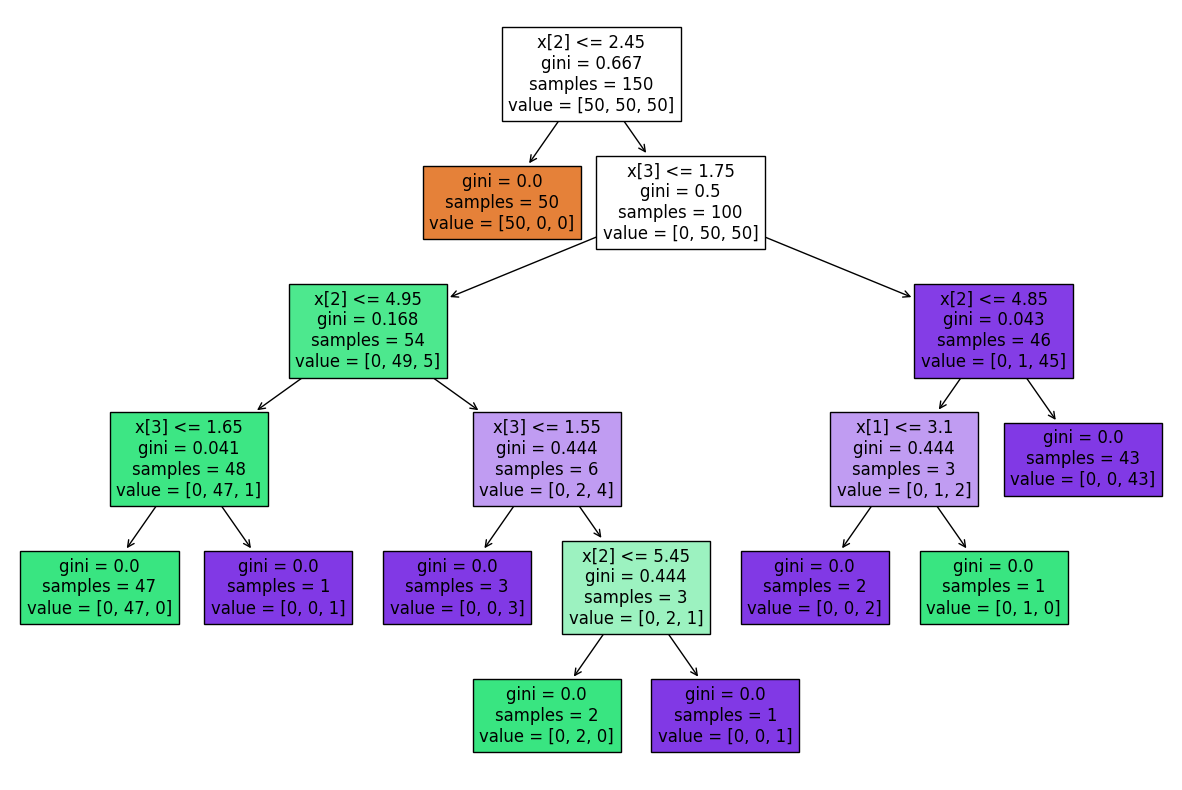

In [76]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)#filled argument will give color to nodes

### Unsupervised ML


#### Performance Metrics Clustering-Silhouetter Coefficient

In [78]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [79]:
#Generating the sample data from make_blobs
# This particular setting has distinct cluster and 3 clusters placed close together

X, y= make_blobs(n_samples=500, n_features=2, cluster_std=1, center_box=(-10.0,10.0),
                 shuffle=True, random_state=1)

range_n_clusters = [2,3,4,5,6]

In [80]:
X


array([[-1.01409082e+01, -2.92036477e+00],
       [-1.08491682e+01, -2.95246712e+00],
       [-7.87106040e+00, -8.10416641e+00],
       [ 5.31139823e-01,  2.51012895e+00],
       [-5.99589621e+00, -8.36298104e+00],
       [ 2.45098802e-01,  5.51754657e+00],
       [-9.37972697e+00, -4.13752487e+00],
       [-7.20423399e+00, -8.88176559e+00],
       [-9.68744022e+00, -6.04759636e+00],
       [-6.63896201e+00, -8.10414771e+00],
       [-6.13362650e+00, -7.20341929e+00],
       [-5.95626543e+00, -8.85614851e+00],
       [-7.25543048e+00, -7.91988898e+00],
       [-5.25790464e-01,  3.30659860e+00],
       [-1.01077040e+01, -3.94479960e+00],
       [-7.29164238e+00, -9.71773596e+00],
       [-1.29322789e+00,  3.36190049e+00],
       [-7.33325349e+00, -8.28490373e+00],
       [-1.97451969e-01,  2.34634916e+00],
       [-6.90021712e+00, -7.37505393e+00],
       [-1.13454774e+01, -2.48260869e+00],
       [-7.21538651e+00, -7.23772884e+00],
       [-9.46883276e+00, -6.19043506e+00],
       [-1.

In [81]:
y

array([1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1,

c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

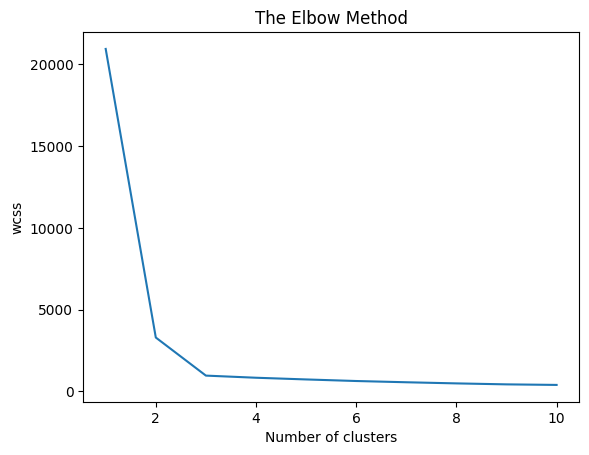

In [82]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [83]:
#Now we check that wether k=3 is valid or not with the help of Silhoutte
cluster= KMeans(n_clusters=4, random_state=10)
cluster_labels = cluster.fit_predict(X)
print(cluster_labels)


[3 3 2 1 2 1 0 2 0 2 2 2 2 1 3 2 1 2 1 2 3 2 0 1 2 2 1 1 3 0 3 1 3 3 0 0 1
 3 3 1 2 2 1 2 2 3 3 2 1 1 1 2 2 2 1 2 0 0 3 1 1 1 1 0 1 0 2 3 3 2 2 1 2 3
 2 0 0 2 2 1 0 1 2 1 1 1 1 1 3 2 1 3 0 2 1 3 3 2 3 1 1 3 1 1 1 3 0 1 1 3 3
 3 1 1 1 1 1 2 1 2 2 3 2 0 2 1 1 0 0 3 1 1 0 2 2 0 1 2 1 1 3 3 3 1 1 1 2 3
 2 2 2 1 1 2 1 2 2 3 3 1 0 1 1 1 2 2 2 2 1 0 1 3 0 1 0 2 3 2 3 2 1 1 2 3 2
 2 3 3 2 1 1 3 2 2 1 2 3 2 1 3 1 2 0 3 0 0 2 2 3 0 0 2 2 0 0 1 0 1 2 3 0 2
 0 3 1 2 3 1 2 1 0 3 1 1 3 2 1 2 2 1 2 2 2 3 2 1 2 1 2 1 1 2 2 1 3 1 2 3 1
 2 1 1 1 1 2 2 0 0 3 1 2 1 1 2 1 3 2 1 0 1 3 2 1 2 1 1 2 0 3 1 2 2 2 3 1 2
 3 3 2 0 3 0 0 3 2 0 2 2 1 1 2 2 2 1 1 2 3 1 1 2 0 1 1 2 1 1 1 2 2 0 1 0 2
 2 1 1 2 2 1 2 2 1 1 0 1 1 1 1 0 3 2 1 1 2 2 1 0 1 2 1 0 2 3 1 2 2 2 1 3 2
 3 0 3 0 3 0 1 3 1 1 0 1 2 1 2 3 1 0 1 0 2 1 3 3 3 1 1 2 3 2 1 2 2 2 2 2 0
 3 3 2 0 3 3 1 0 1 3 2 1 0 2 1 2 2 1 1 3 2 0 2 3 1 3 2 1 3 3 0 1 1 2 0 2 2
 3 3 0 2 2 2 2 2 2 0 2 3 3 2 1 1 2 3 2 1 1 1 3 2 0 2 1 1 2 0 1 2 1 3 2 1 1
 3 3 2 0 1 1 0 3 2 1 1 2 

c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.7678049780292223


c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.7308416071146798
For n_clusters = 4 The average silhouette_score is : 0.6072161322987585
For n_clusters = 5 The average silhouette_score is : 0.4331211232470558


c:\Users\bhavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.3224225457032213


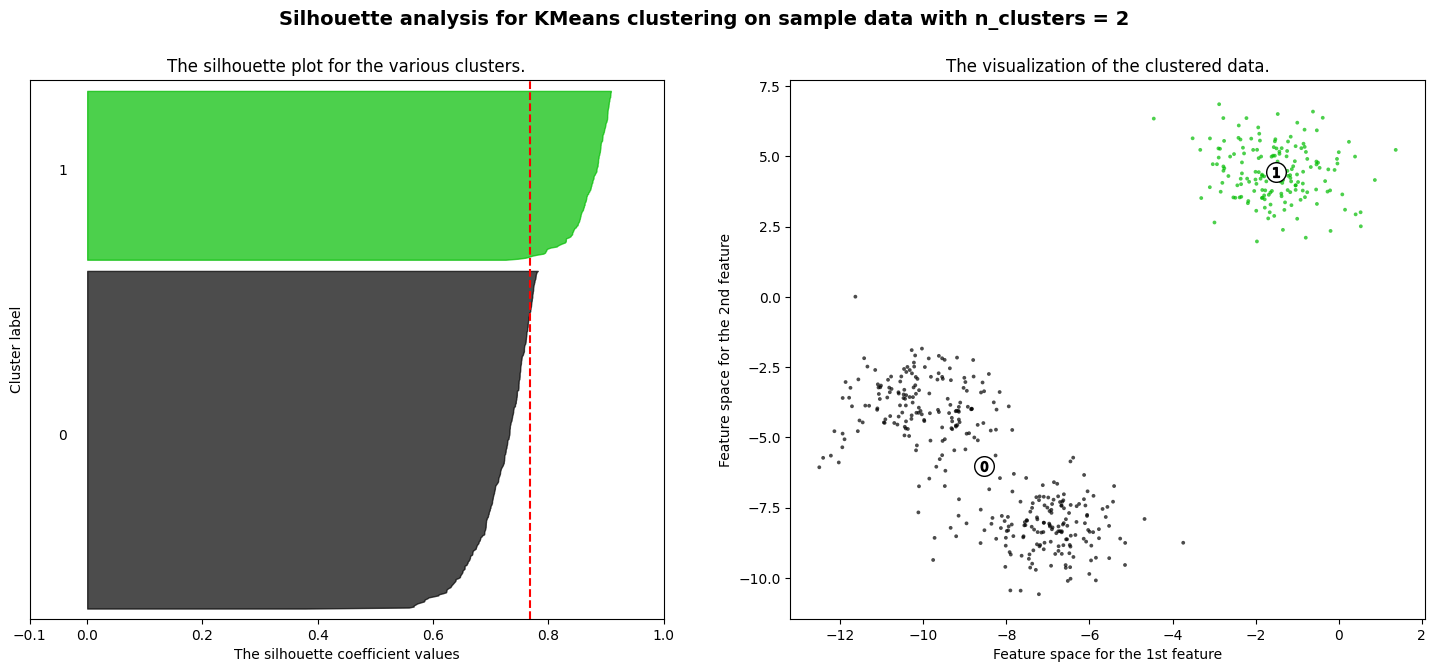

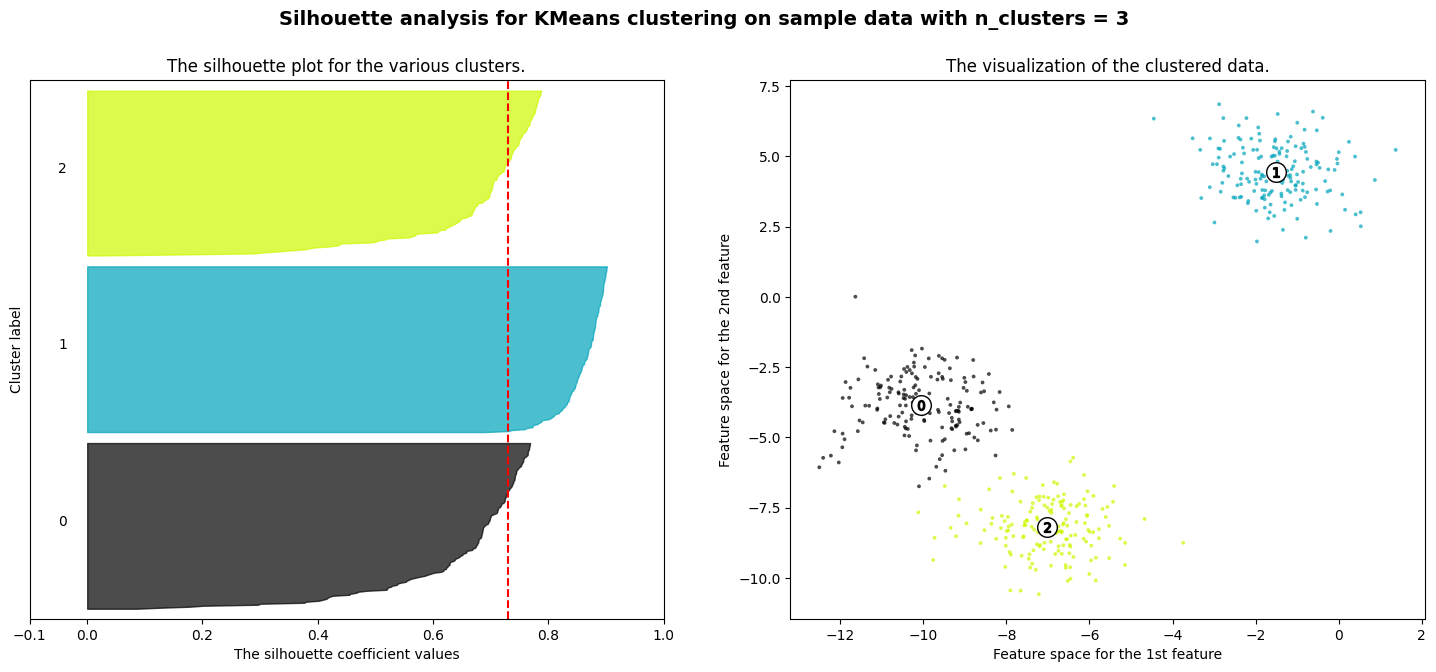

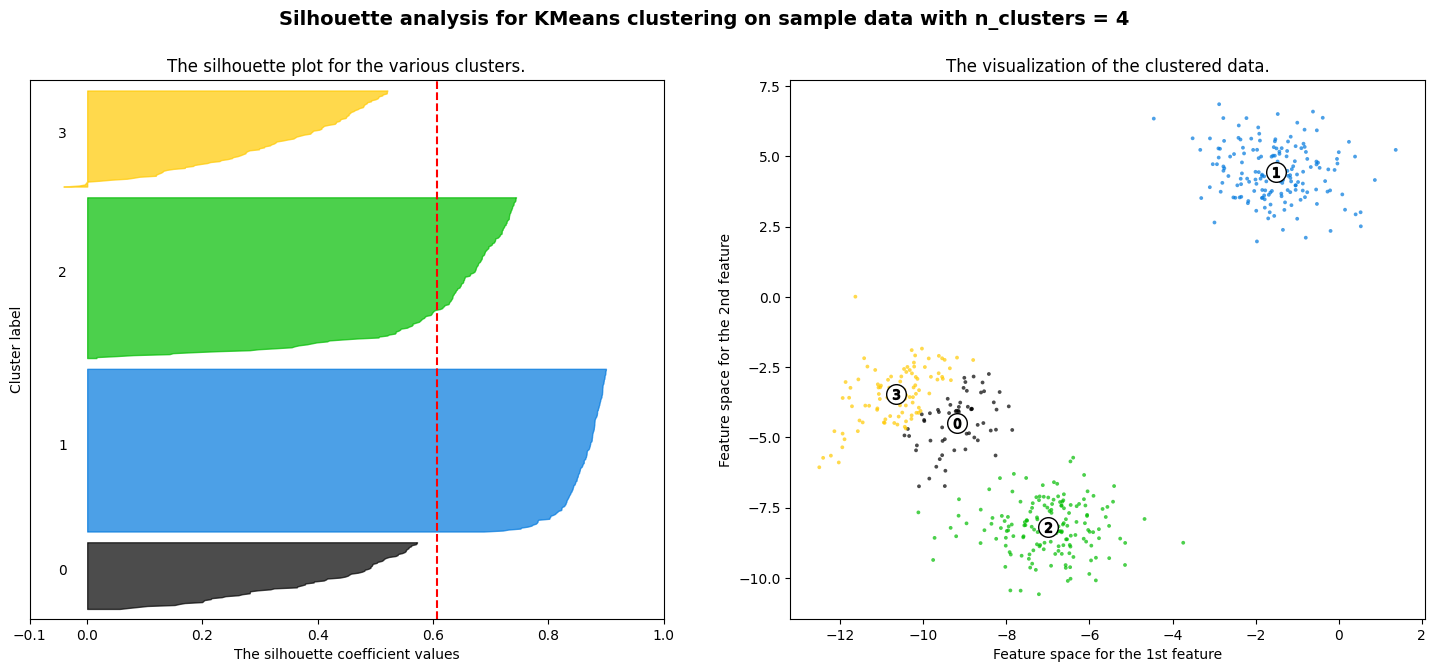

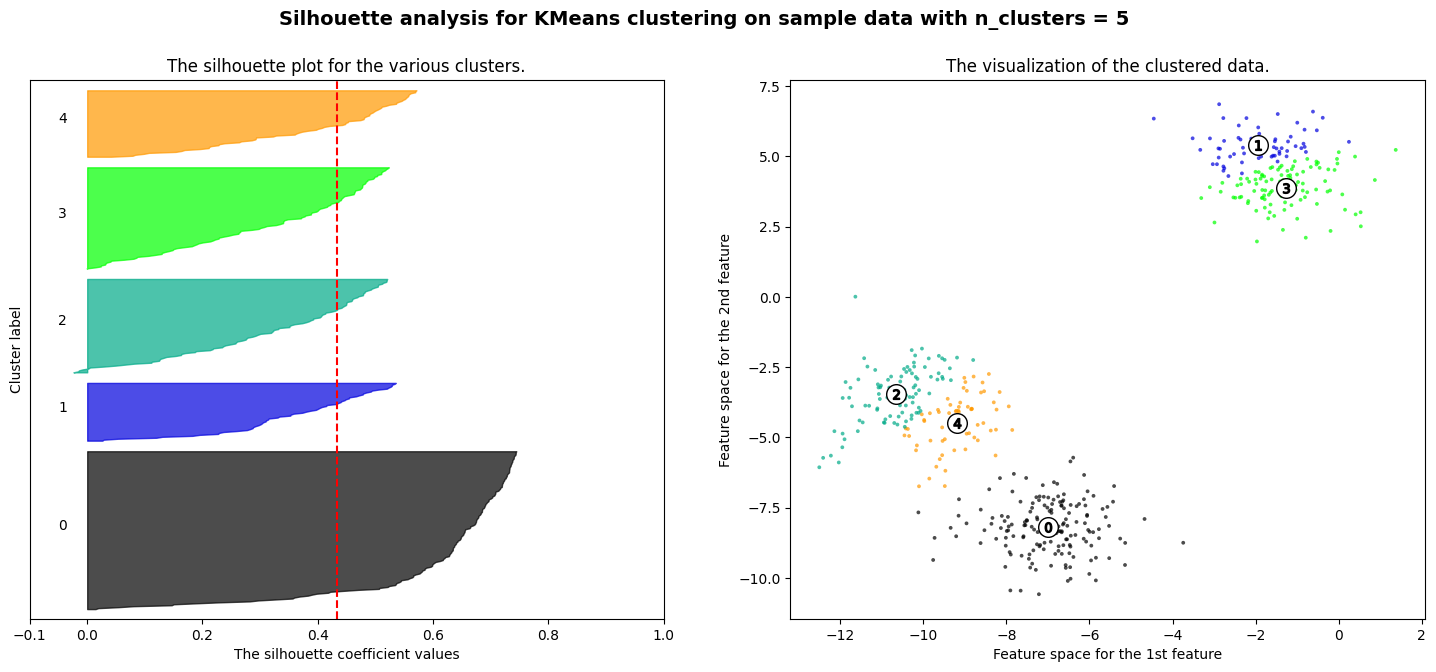

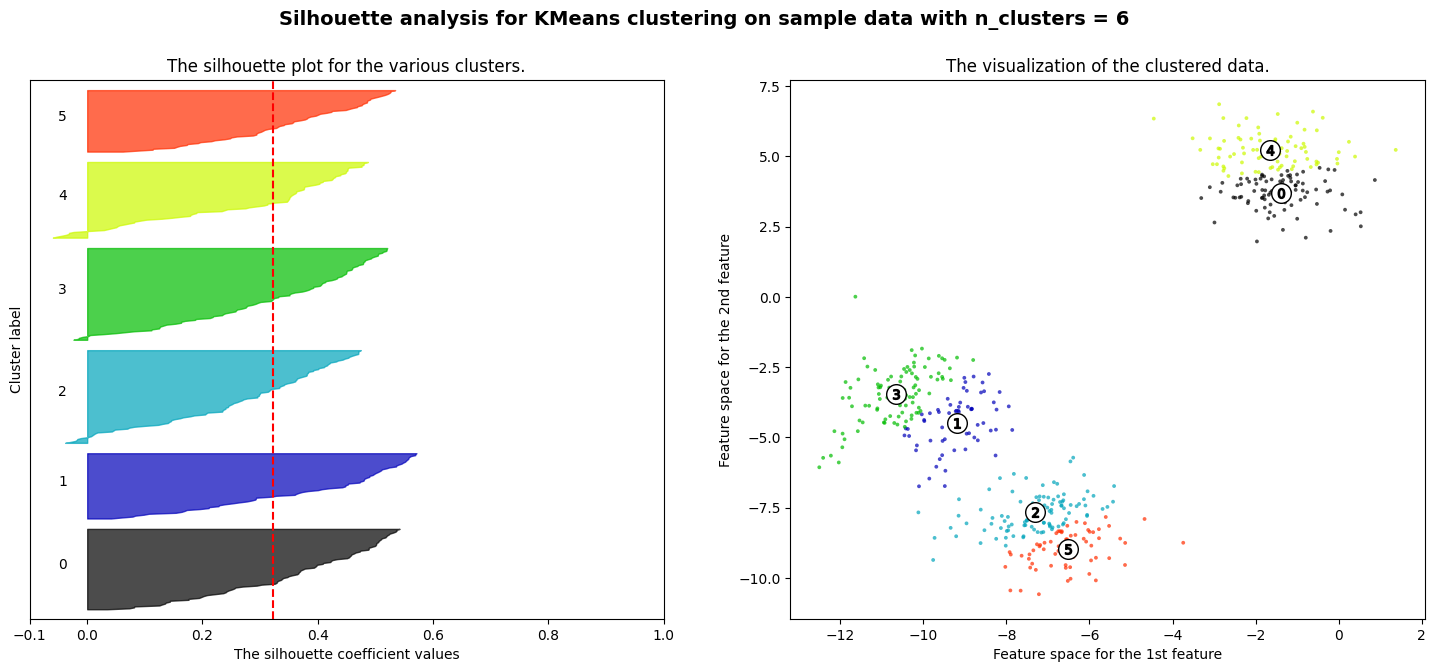

In [84]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()